#### Introduction

##### Basic explore


##### The Augmented Dickey-Fuller (ADF)


##### Transforming stationarity - Differencing

##### Rolling Mean and Standard Deviation

##### Scaling down the data
- log
- StandardScaler & MinMaxScaler

link: https://www.centralbank.go.ke/rates/forex-exchange-rates/

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("data21125.csv", parse_dates=['Date'])

In [5]:
data.head(3)

,Date,Time,Currency,Mean-value,Buy,Sell
0,2016-10-11,12:00:00 AM,US DOLLAR,101.28,101.19,101.38
1,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39
2,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39


In [7]:
data.tail(3)

,Date,Time,Currency,Mean-value,Buy,Sell
1800,2024-01-02,12:00:00 AM,US DOLLAR,156.99,156.50,157.47
1801,2024-01-02,12:00:00 AM,US DOLLAR,157.32,156.95,157.69
1802,2024-01-03,12:00:00 AM,US DOLLAR,157.32,156.95,157.69


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1803 non-null   datetime64[ns]
 1   Time        1803 non-null   object        
 2   Currency    1803 non-null   object        
 3   Mean-value  1803 non-null   float64       
 4   Buy         1803 non-null   float64       
 5   Sell        1803 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 84.6+ KB


In [30]:
data2 = pd.read_csv("data21125.csv", index_col=['Date'], parse_dates=True)

In [32]:
data2.head()

,Time,Currency,Mean-value,Buy,Sell
Date,,,,,
2016-10-11,12:00:00 AM,US DOLLAR,101.28,101.19,101.38
2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39
2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39
2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39
2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39


<Axes: xlabel='Date'>

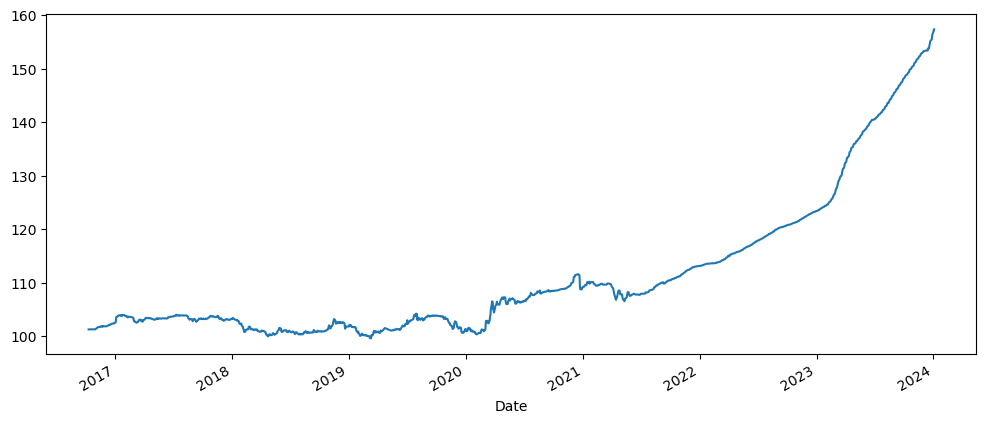

In [36]:
data2['Mean-value'].plot(figsize=(12,5))

In [44]:
data.max()

Date          2024-01-03 00:00:00
Time                  12:00:00 AM
Currency                US DOLLAR
Mean-value                 157.32
Buy                        156.95
Sell                       157.69
dtype: object

#### The Augmented Dickey-Fuller (ADF) 

Test is a statistical test used to determine whether a time series is stationary or non-stationary. Stationarity means that the statistical properties of the series, such as mean and variance, are constant over time.

In [47]:
from statsmodels.tsa.stattools import adfuller

#create a function
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-VAlue : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of observations used for ADF and Critical Values Calculations :", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [49]:
ad_test(data['Mean-value'])

1. ADF :  4.226090736322659
2. P-VAlue :  1.0
3. Num of Lags :  24
4. Num of observations used for ADF and Critical Values Calculations : 1778
5. Critical Values : 
	 1% :  -3.4340332205127657
	 5% :  -2.8631669370039785
	 10% :  -2.567636130407771


### Observations
#### Hypothesis
##### Null Hypothesis : The series is non-stationary
##### Alternative Hypothesis : The series is stationary

The ADF test statistic is very high, indicating non-stationarity, therefore we fail to reject the null hyposthesis.
Also the test statistic is greater that critical values at all times, therefore we fail to reject the null hypothesis.

P-value > 0.05, fail to reject Null Hypothesis (non-stationary)
    

#### Scalling down the data

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [59]:
# Standard Scaler

scaler = StandardScaler()
data['scaled-value'] = scaler.fit_transform(data[['Mean-value']])
data.head()

,Date,Time,Currency,Mean-value,Buy,Sell,scaled-value
0,2016-10-11,12:00:00 AM,US DOLLAR,101.28,101.19,101.38,-0.748717
1,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213
2,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213
3,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213
4,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213


In [63]:
## data['scaled-value'].plot(figsize=(12,5))

#Nothing really changed

In [65]:
minmax = MinMaxScaler()

data['minmax-value'] = minmax.fit_transform(data[['Mean-value']])
data.head()

,Date,Time,Currency,Mean-value,Buy,Sell,scaled-value,minmax-value
0,2016-10-11,12:00:00 AM,US DOLLAR,101.28,101.19,101.38,-0.748717,0.028938
1,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213,0.029284
2,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213,0.029284
3,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213,0.029284
4,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213,0.029284


In [69]:
## data['minmax-value'].plot(figsize=(12,5))

#Nothing really changed

In [71]:
import numpy as np

data['log-value'] = np.log(data['Mean-value'])
data.head()

,Date,Time,Currency,Mean-value,Buy,Sell,scaled-value,minmax-value,log-value
0,2016-10-11,12:00:00 AM,US DOLLAR,101.28,101.19,101.38,-0.748717,0.028938,4.617889
1,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213,0.029284,4.618086
2,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213,0.029284,4.618086
3,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213,0.029284,4.618086
4,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,-0.747213,0.029284,4.618086


In [75]:
## data['log-value'].plot(figsize=(12,5))

# nothing really changed

#### Transforming to Stationarity : Differencing

In [9]:
data_diff = data['Mean-value'].diff().dropna()

In [11]:
data_diff

1       0.02
2       0.00
3       0.00
4       0.00
5       0.00
        ... 
1798    0.62
1799    0.37
1800    0.53
1801    0.33
1802    0.00
Name: Mean-value, Length: 1802, dtype: float64

<Axes: >

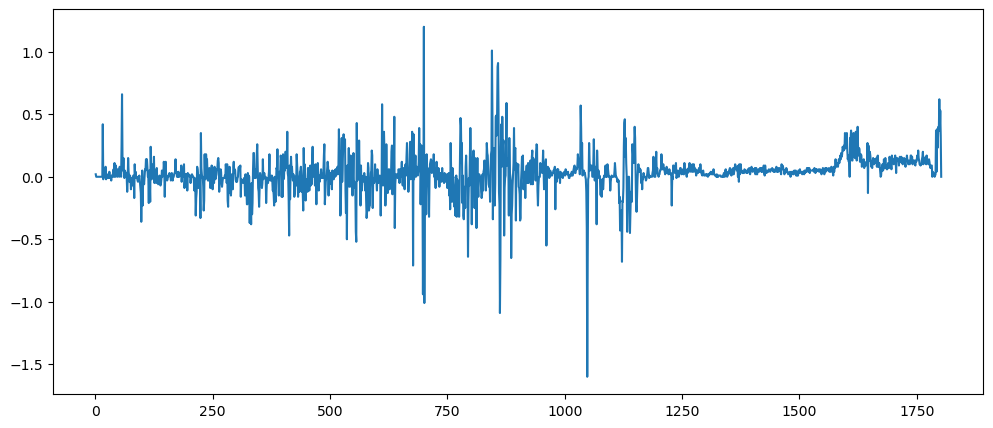

In [13]:
data_diff.plot(figsize=(12,5))

In [15]:
# lets check for seasonality

ad_test(data_diff)

NameError: name 'ad_test' is not defined

##### We reject Null Hypothesis

In [17]:
data['diff-value'] = data_diff

In [19]:
data.head()

,Date,Time,Currency,Mean-value,Buy,Sell,diff-value
0,2016-10-11,12:00:00 AM,US DOLLAR,101.28,101.19,101.38,NaN
1,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,0.02
2,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,0.00
3,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,0.00
4,2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,0.00


In [21]:
data = data.fillna(0)

In [9]:
data.to_csv("differenced_value_data.csv", index=False)

In [99]:
data['diff-value'].describe()

count    1803.000000
mean        0.031082
std         0.151853
min        -1.600000
25%        -0.010000
50%         0.030000
75%         0.080000
max         1.200000
Name: diff-value, dtype: float64

#### Rolling Mean and Standard Deviation

In [119]:
import matplotlib.pyplot as plt

def check_stationarity(timeseries):
    
    #defining  the rolling statistics
    
    rol_mean =  timeseries.rolling(window=30,center=False).mean()
    rol_std = timeseries.rolling(window=30,center=False).std()
   
    #plot rolling statistics
    
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries, color='blue',label='Original Ts')
    mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_std, color='black', label = 'Rolling Std')
    plt.xlabel('Dates')
    plt.ylabel('Number of Orders')
    plt.legend(loc='best')
    plt.title('Rolling Mean And Standard Deviation')
    plt.show(block=False)

In [121]:
data3 = pd.read_csv('data21125.csv', index_col=['Date'], parse_dates=True).drop(columns =["Time","Currency", "Buy", "Sell"], axis=1)

In [123]:
data3.head()

,Mean-value
Date,
2016-10-11,101.28
2016-10-13,101.30
2016-10-13,101.30
2016-10-13,101.30
2016-10-13,101.30


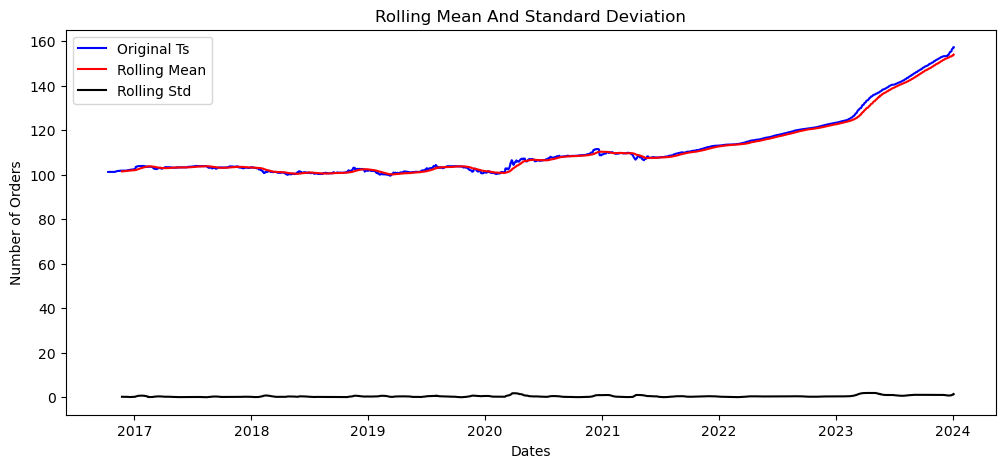

In [125]:
import matplotlib.pyplot as plt
check_stationarity(data3)